In [1]:
import numpy as np

In [2]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
        return x

In [7]:
x = np.array([2, 1, 4, 3, 5])
%timeit selection_sort(x)

26.3 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
def bogo_sort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [8]:
x = np.array([2, 1, 4, 3, 5])
%timeit bogo_sort(x)

38 µs ± 280 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Fast sorting

In [9]:
x = np.array([2, 1, 4, 3, 5])
%timeit np.sort(x)

19.7 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [11]:
x[i]

array([1, 2, 3, 4, 5])

In [12]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [13]:
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [14]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial sorts

In [15]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [16]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Example: k-Nearest Neighbors

In [17]:
X = rand.rand(10,2)

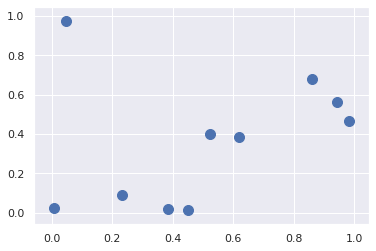

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[: ,1], s=100);

In [20]:
dist_sq = np.sum((X[:, np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [21]:
# For each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [22]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [23]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [24]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [26]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)

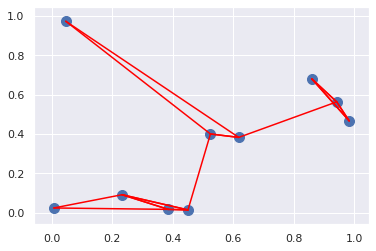

In [28]:
plt.scatter(X[:, 0], X[:, 1], s=100)

K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='red')